> **Please Note**: The format used here is a template originally developed by [Udacity](https://www.udacity.com) for general use and modification in the "Investigate a Dataset Project" for [Data Analyst Nanodegree]()

# Project: Analysing A No-Show Appointments Medical Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is aimed at investigating a dataset with information from 100,000 medical appointments in Brazil and is concentrating on finding insights on possible factors influencing patients attitude towards showing or not showing up for appointments. 

A few notes on understanding the dataset as found on [kaggle](https://www.kaggle.com/joniarroba/noshowappointments/discussion)

>    * PatientId: Identification Number of a patient
>    * AppointmentID: Identification Number of each appointment
>    * Gender: Male or Female
>    * ScheduledDay: The day of the actual appointment
>    * Appointmentday: The day a patient honoured the appointment
>    * Age: How old the patient is
>    * Neighbourhood: Area where the appointment was scheduled
>    * Scholarship: True or False if the patient is government sponsored
>    * Hipertension: True or False if the patient is hypertensive
>    * Diabetes: True or False if the patient is diabetic
>    * Alcoholism: True or False if the patient is an alcholic
>    * Handcap: Number of disabilities a patient has
>    * SMS_received: Whether patient received sms prior to appointment
>    * No-show: "No" indicates if the patient showed up for the appointment and "Yes" if they ignored the appointment


Considering the notes above, it is imperative to carry out the following investigations: 

>
> * Is there a certain age category of patients that are missing medical appointments more?
> * Are patients on scholarships likely to show up to medical appointments than those without scholarships?
> * Does receiving sms prior to medical appointment influence whether a patient shows up or not?


In [3]:
# Importing libraries numpy, pandas, matplotlib plus the "magic word" (%matplotlib inline)
# so that the visualisations are plotted inline with the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns      # Seaborn enhances plots
from numpy import arange

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Data wrangling involves loading the gathered dataset, assessing its features and cleaning the data to achieve a possibly high quality and well structured dataset.

In [4]:
# Loading the no show appoinments dataset
no_show_app_data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv") #pandas format for reading csv files
no_show_app_data.shape  #understanding the shape of the dataset

(110527, 14)

There are 110,527 rows and 14 columns.

In [5]:
#viewing first 10 rows of loaded data
no_show_app_data.head(10)  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


It is seen that the column headers are in <span style="color:red"> _**CamelCase**_ </span> format, preferred is the <span style="color:red"> _**snake_case**_ </span> and all _small letters_ for consistency. <span style="color:red">"No-show"</span> appointment header has a hyphen with row values of 'yes' or 'no', <span style="color:red">PatientId</span> appears in scientific notation, the date format for <span style="color:red">**ScheduledDay**</span> and <span style="color:red">**AppointmentDay**</span> columns has both date and time in each column. While <span style="color:red">**ScheduledDay**</span> has different time recordings, it appears <span style="color:red">**AppointmentDay**</span> has no time recorded. <span style="color:red">"Handcap" and "Hipertension"</span> are spelt wrongly rather than _Handicap_ and _Hypertension_ . 

It is a good practice to view the summary statistics and data types associated with each variable in the dataset using the pandas describe() and info() functions

In [6]:
#getting information on data types of each column
no_show_app_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data as seen above. <span style="color:red">ScheduledDay</span> and <span style="color:red">AppointmentDay</span> appear to be string data types which will make calculations difficult, though a patient's id may not neccessarily impact their response to medical appointments, it is a float type and would be better as an "int" type. 

In [7]:
# obtaining summary statistics of dataset(with include='all' to get both categorical and numeric columns)
no_show_app_data.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


The average age of the patients is 37 years and more of them are above 55 years. The oldest patient is 115 years old while the minimum age appears to be -1 which is questionable and requires further analysis. About 10% only of the patients are on scholarship, 3% take alchohol, 2% of them are handicapped and 19% are hypetensive.  There is need to check for duplicated values.

In [8]:
#checking for duplicated values and number of occurences
no_show_app_data.duplicated().value_counts() 

False    110527
dtype: int64


There are no duplicate records. It may be necessary to investigate 'PatientId' and 'AppointmetId' to be more certain that all records are dinstinct.

In [9]:
#Checking for duplicates in PatientId
no_show_app_data["PatientId"].duplicated().value_counts()

False    62299
True     48228
Name: PatientId, dtype: int64

About 48,228 records have duplicated 'PatientId' and this points to multiple appointments by patients

In [10]:
#Checking for duplicated appointments
no_show_app_data["AppointmentID"].duplicated().value_counts()

False    110527
Name: AppointmentID, dtype: int64

All appointments are distinct.

### Data Cleaning

This is the process of getting rid of wrong data types, column header spelling errors and formats, better value representation. There are no duplicated values nor null values.  

In [11]:
# corrrecting column headers
# viewing the existing columns
no_show_app_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
# Using the pandas.Dataframe.rename function to correct all column header names
no_show_app_data = no_show_app_data.rename(columns={'PatientId': 'patient_id',
               'AppointmentID': 'appointment_id', 
               'Gender':'gender', 
               'ScheduledDay':'scheduled_day',
               'AppointmentDay':'appointment_day', 
               'Age':'age', 
               'Neighbourhood':'neighbourhood', 
               'Scholarship':'scholarship', 
               'Hipertension':'hypertension',
               'Diabetes':'diabetes', 
               'Alcoholism':'alcholism', 
               'Handcap':'handicap', 
               'SMS_received':'sms_received', 
               'No-show':'no_show'})

In [13]:
# confirming the change to column names
no_show_app_data.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [14]:
#checking data types of renamed columns
no_show_app_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcholism        110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


"patient_id" is a float type. This can be changed to integer

In [15]:
# Changing the dtype of patient_id from float to int64
no_show_app_data["patient_id"] = no_show_app_data["patient_id"].astype('int64')
no_show_app_data["patient_id"].dtype #confirming dtype change

dtype('int64')

In [16]:
no_show_app_data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Changing the **no_show** column categorical values to numerical values of 'Yes' == 0 and 'No' == 1 respectively for better counting

In [17]:
# checking for unique values in the no_show column
no_show_app_data["no_show"].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
# Using the pandas Series.map function
new_value = {'No':1, 'Yes':0} # new dictionary with values 1 and 0 assigned to keys 'No' and 'Yes'
no_show_app_data['no_show'] = no_show_app_data['no_show'].map(new_value) # applying the mapping function with created dict

In [19]:
# confirming changes to original no_show column
no_show_app_data["no_show"].unique() 

array([1, 0], dtype=int64)

Changing data type of _'scheduled_day'_ and _'appointment_day'_ columns from _'object'_  type to  _'datetime'_ type

In [20]:
# using the pandas to_datetime function to convert to datetime object
no_show_app_data['scheduled_day'] = pd.to_datetime(no_show_app_data['scheduled_day'])
no_show_app_data['appointment_day'] = pd.to_datetime(no_show_app_data['appointment_day'])
print(no_show_app_data['scheduled_day'].dtype, no_show_app_data['appointment_day'].dtype) # checking result of conversion

datetime64[ns, UTC] datetime64[ns, UTC]


In [21]:
#further confirmation of all data types
no_show_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcholism        110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In [22]:
# checking the period of the entire appointments
start_date = no_show_app_data['appointment_day'].min() #appointment begins
end_date = no_show_app_data['appointment_day'].max()  #appointment ends
period = (end_date - start_date)        # difference 
period

Timedelta('40 days 00:00:00')

It is now clear that the appointments in the dataset spanned for about 40 days. Is there a particular day of the week that most patients showed up for appointments? Creating week days of appointment column is necessary.

In [23]:
# Creating week_day_of_app column
no_show_app_data['week_day_of_app'] = no_show_app_data.scheduled_day.dt.strftime('%A')
no_show_app_data['week_day_of_app'].value_counts() # Viewing values of the week_day_of_app

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: week_day_of_app, dtype: int64

Most appointments happened in the early days of the week Monday, Tuesday and Wednesday while Saturday, a weekend showed very few appointments. There is need to replacing Age values less than zero as this is not feasible and may be due to entry error .

In [24]:
# checking for ages less than 0
no_show_app_data[no_show_app_data['age'] < 0].count() # using a mask to filter the dataframe

patient_id         1
appointment_id     1
gender             1
scheduled_day      1
appointment_day    1
age                1
neighbourhood      1
scholarship        1
hypertension       1
diabetes           1
alcholism          1
handicap           1
sms_received       1
no_show            1
week_day_of_app    1
dtype: int64

There is only one value with a negative age. It can be discarded

In [25]:
# removing the negative age less than 0
no_show_app_data = no_show_app_data.query('age >= 0')
no_show_app_data.info() #insight on dataset information after drop of negative ages

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  int64              
 1   appointment_id   110526 non-null  int64              
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  int64              
 8   hypertension     110526 non-null  int64              
 9   diabetes         110526 non-null  int64              
 10  alcholism        110526 non-null  int64              
 11  handicap         110526 non-null  int64              
 12  sms_received     110526 non-null  int64              
 13 

Appointment Id may not neccessarily influence the ability of patients to show up or not for medical appointment, but there is need to investigate the "patient_id" to ascertain if one patient had multiple appointments

In [26]:
#checking for duplicate patient ids
no_show_app_data["patient_id"].duplicated().sum()

48228

Apparently, some patients may have had multiple bookings. The 'appointment_id' is likely not going to affect patients response to medical appointments. So,it is either made the index or dropped. Here, it is dropped.

In [27]:
#dropping the 'appointment_id' column
no_show_app_data.drop(['appointment_id'], axis=1, inplace=True)

In [28]:
#confirm dropping of 'appointment_id' column
no_show_app_data.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcholism',
       'handicap', 'sms_received', 'no_show', 'week_day_of_app'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

#### First, it is important to have a general histogram view of the dataframe


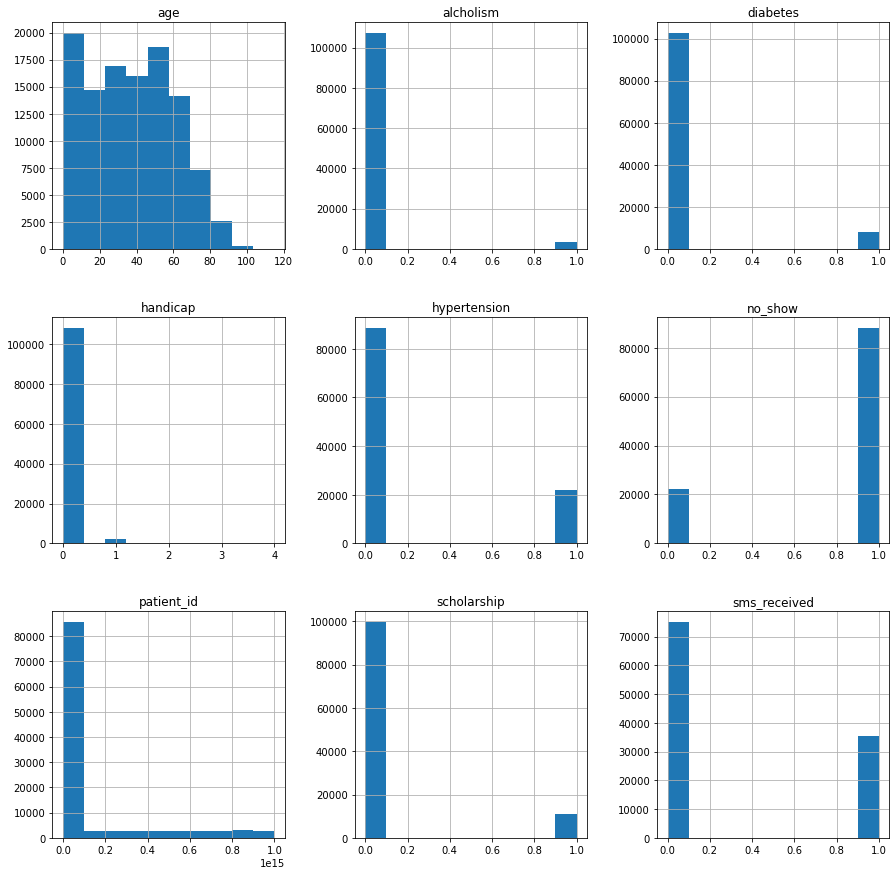

In [29]:
# histogram of the whole DataFrame
no_show_app_data.hist(figsize=(15,15));

There are more patients between ages 0 and 65 with lesser patients above 80. A greater number of the patients are not alchoholics, same with diabetes but number of diabetic patients is slightly higher than patients who take alchohol. Patients with disabilities are very small comapared to patients didn't. Meanwhile, a quarter of the patients appear to be hypertensive. Overall, patients who did not show up for appointments is significantly higher than those who turned up. A closer look at the age category and their response to medical appointments.

####  1. Is there a certain age category of patients that are missing medical appointments more?

In [30]:
# looking at the mean age
no_show_app_data['age'].mean()

37.089218826339504

In [31]:
# looking at the max age
no_show_app_data['age'].max()

115

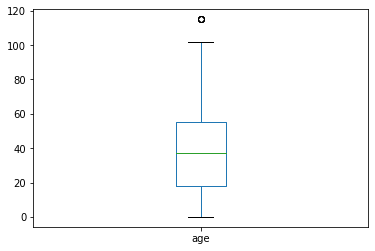

In [32]:
# checking for outliers
no_show_app_data['age'].plot(kind='box');

Above the age of 100, there are outliers which can affect our analysis. However, ages above 100 are very possible and would be retained in our analysis.

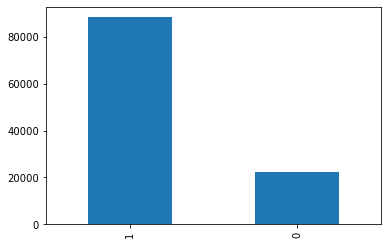

In [33]:
# viewing the distribution of no show for entire dataset
no_show_app_data['no_show'].value_counts().plot(kind='bar');

A greater number of patients from the dataset showed up for medical appointments than those who did not show up. It is now ideal to create a mask variable for patients between 0 and the mean age of 37.

In [34]:
# variable for ages 0 to 37 
no_show_app_data['age_0_to_37'] = no_show_app_data['age'] <= 37
no_show_app_data['age_0_to_37'].head(20) #viewing first 20 rows of the bool variable mask

0     False
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15     True
16    False
17    False
18     True
19    False
Name: age_0_to_37, dtype: bool

In [35]:
# counting the distribution for ages 0 to 37 and those above the mean age that showed up/did not show up
#using pandas size() function to count no_show for each group
no_show_app_data.groupby(['age_0_to_37', 'no_show']).size()

age_0_to_37  no_show
False        0           9558
             1          44852
True         0          12761
             1          43355
dtype: int64

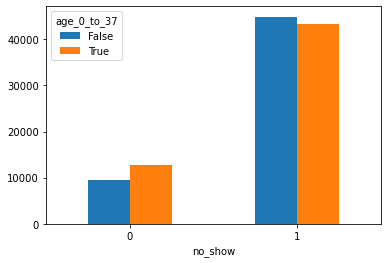

In [36]:
#viewing the distribution for ages below and equal to the mean age and those above the mean age that showed up/did not show up
#using pandas unstack() function to move groups from row index to create tables
#rot=0: rotation == 0 parameter which aligns ticks in a friendly readable format
no_show_app_data.groupby(['age_0_to_37', 'no_show']).size().unstack(level=0).plot.bar(rot=0);

From the distribution, it slightly appears that more people above 37 years showed up for appointments than those below the mean age. Infants and aged people tend to have more attention to health and this investigation is neccesary.

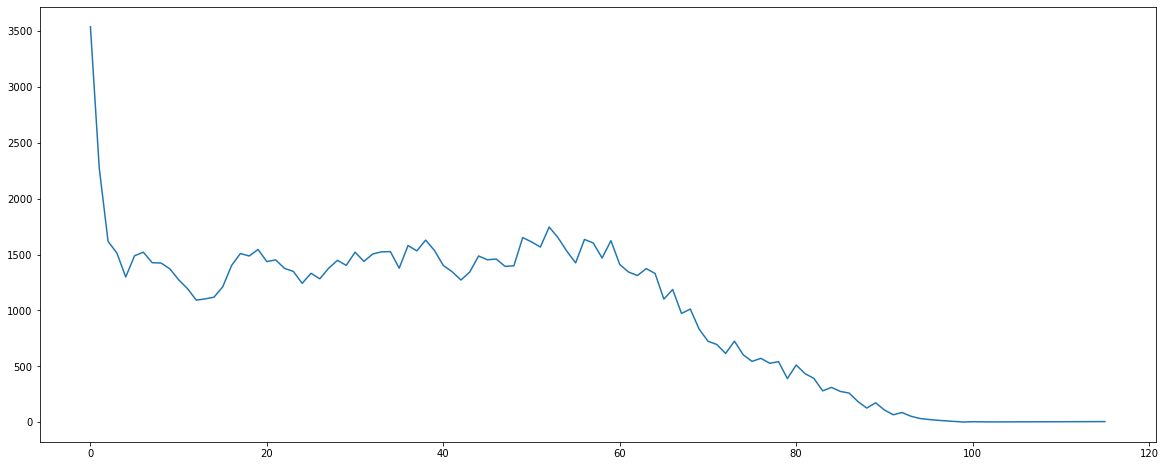

In [80]:
#viewing the distribution of all ages 
no_show_app_data['age'].value_counts().sort_index().plot(kind='line', figsize=(20, 8), rot=0);

Obviously, there are more infants as compared to other ages. A peek at how they attended to their appointments will show how parents take medical appointments of new borns.

In [92]:
# grouping the infants not uo to 1 year
no_show_app_data['children_0_to_3'] = no_show_app_data['age'] >= 3
no_show_app_data.groupby(['children_0_to_3', 'no_show']).size()

children_0_to_3  no_show
False            0           1306
                 1           6124
True             0          21013
                 1          82083
dtype: int64

In [93]:
# total infants
no_show_app_data['children_0_to_3'].sum()

103096

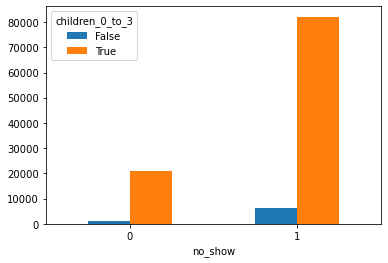

In [94]:
# viewing the distribution
no_show_app_data.groupby(['children_0_to_3', 'no_show']).size().unstack(level=0).plot.bar(rot=0);

It can be seen that more infants and children showed up for medical appointments than those who didn't. Let's look at the aged say above 75 years, since [life expectancy in Brazil by 2016](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=BR) was 75 years.

In [90]:
#creating a variable for those above 80 years
no_show_app_data['age_above_75'] = no_show_app_data['age'] > 75
no_show_app_data['age_above_75'].value_counts() #counting those above 75 years

False    105134
True       5392
Name: age_above_75, dtype: int64

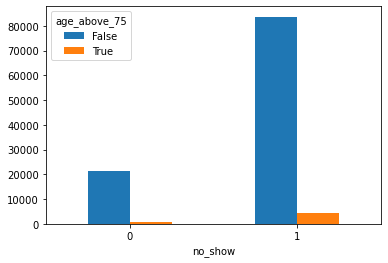

In [91]:
# viewing the distribution
no_show_app_data.groupby(['age_above_75', 'no_show']).size().unstack(level=0).plot.bar(rot=0);

Most patients above 75 years showed up for appointments as compared to those who did not but those below 75 had more appointments and significantly showed up more.

####  Are patients on scholarships likely to show up to medical appointments than those without scholarships?

In [97]:
# counting patients with scholarships with respect to no show
no_show_app_data.groupby(['scholarship', 'no_show']).size()

scholarship  no_show
0            0          19741
             1          79924
1            0           2578
             1           8283
dtype: int64

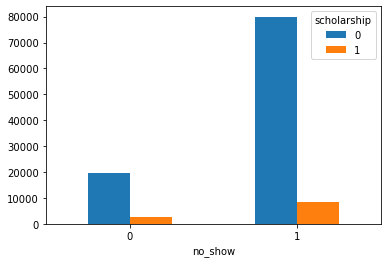

In [98]:
#viewing the distribution
no_show_app_data.groupby(['scholarship', 'no_show']).size().unstack(level=0).plot.bar(rot=0);

Those who showed up more to medical appointments appear to be those who were not on scholarships. There appears to be no correlation between having scholarships and showing up for medical appointments.

####  Does receiving sms prior to medical appointment influence whether a patient shows up or not?

In [99]:
# counting those who received sms and did not 
no_show_app_data['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

Apparently, one-third of the patients didn't receive sms prior to their appointments. Now, a look at how they responded to medical appointments

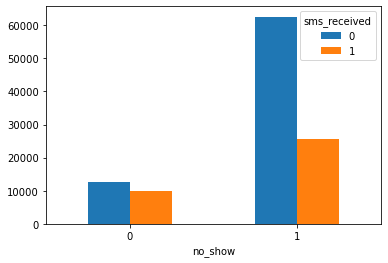

In [100]:
# viewing the distribution between receiving sms and no show
no_show_app_data.groupby(['sms_received', 'no_show']).size().unstack(level=0).plot.bar(rot=0);

There is no correlation between receiving sms and showing up for appointments as seen above. Obviously, patients who did not receive sms showed up more for appointments than those who received. 

<a id='conclusions'></a>
### Conclusions

Following the analysis above, it can be concluded that:

>  1. Infants and children between 0 and 3 years are likely to show up for medical appointments than older people
>  2. Scholarships did not influence patients ability to show up for medical appointments
>  3. Receiving sms prior to appointments did not show any significant impact on how patients treat their medical appoinments

### Limitations

In the course of this analysis, certain limitations appeared visible as with data analysis.

>  1. The [2016 Brazil population](https://www.worldometers.info/world-population/brazil-population/) was put at 206 million. Only one sample has been analyzed and another sample from the population may produce a different result considering factors such as proximity to medical facilities, prevalent geographical health chalenges, mode of transportation etc.
>  2. This analysis did not include statistical analysis and inferences to test the reliability of our conclusions derived from the dataset. 


### Resources
> * [ 'day_of_week_app' ](https://thispointer.com/python-how-to-convert-datetime-object-to-string-using-datetime-strftime/)
> * [2016 Brazil Life Expectancy](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=BR)